# Proyek Analisis Data: Bike-Sharing
- **Nama:** NADYA ILMA PRATIWI
- **Email:** nadyailma73@gmail.com
- **ID Dicoding:** m296b4kx3211

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berdasarkan musimnya?
- Pada pukul berapa penyewaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [74]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [75]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Load tabel day
- Load tabel hour

### Assessing Data

memeriksa missing value

In [76]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tidak ada missing value

In [77]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


memeriksa missing value

In [78]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


tidak ada missing value

In [79]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- pada tabel day, dteday masih berupa object
- pada tabel hour, dteday masih berupa object

### Cleaning Data

 mengubah kolom dteday di day_df menjadi datetime

In [80]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

 mengubah kolom dteday di hour_df menjadi datetime

In [81]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- semua tipe data sudah sesuai, dteday sudah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

menampilkan day_df untuk memeriksa anomali

In [82]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Karena akan mengambil data season untuk melihat tren penjualan, maka data season diganti dengan nama.

In [83]:
season_map = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


menampilkan cnt berdasarkan season untuk memeriksa anomali

In [84]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum","max", "min", "mean", "std"]
})

instant      cnt                                      
       nunique      sum   max   min         mean          std
season                                                       
fall       188  1061129  8714  1115  5644.303191  1459.800381
spring     181   471348  7836   431  2604.132597  1399.942119
summer     184   918589  8362   795  4992.331522  1695.977235
winter     178   841613  8555    22  4728.162921  1699.615261

menampilkan hour_df untuk memeriksa anomali

In [85]:
hour_df.describe()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


menampilkan cnt berdasarkan jam untuk memeriksa anomali

In [86]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant     cnt                                 
   nunique     sum  max min        mean         std
hr                                                 
0      726   39130  283   2   53.898072   42.307910
1      724   24164  168   1   33.375691   33.538727
2      715   16352  132   1   22.869930   26.578642
3      697    8174   79   1   11.727403   13.239190
4      697    4428   28   1    6.352941    4.143818
5      717   14261   66   1   19.889819   13.200765
6      725   55132  213   1   76.044138   55.084348
7      727  154171  596   1  212.064649  161.441936
8      727  261001  839   5  359.011004  235.189285
9      727  159438  426  14  219.309491   93.703458
10     727  126257  539   8  173.668501  102.205413
11     727  151320  663  10  208.143054  127.495536
12     728  184414  776   3  253.315934  145.081134
13     729  184919  760  11  253.661180  148.107657
14     729  175652  750  12  240.949246  147.271574
15     729  183149  750   7  251.233196  144.632541
16     730  227748  783  11  311.983562  148.682618
17     730  336860  976  15  461.452055  232.656611
18     728  309772  977  23  425.510989  224.639304
19     728  226789  743  11  311.523352  161.050359
20     728  164550  567  11  226.030220  119.670164
21     728  125445  584   6  172.314560   89.788893
22     728   95612  502   9  131.335165   69.937782
23     728   63941  256   2   87.831044   50.846889

**Insight:**
- Penyewaan sepeda paling banyak ada di musim gugur dengan rata-rata sebanyak 5644, di sini diambil rata-rata cnt nya
- Penjualan tertinggi diperoleh pada pukul 17 yaitu sebanyak 461, diambil rata-rata

## Visualization & Explanatory Analysis

### Pertanyaan 1:

menghitung jumlah cnt berdasarkan season

In [87]:
sum_cnt_w_season = day_df.groupby(by="season")["cnt"].sum().reset_index()
sum_cnt_w_season

,season,cnt
0,fall,1061129
1,spring,471348
2,summer,918589
3,winter,841613


menambahkan kode berikut agar saat penggabungan nanti seasonnya sama

In [88]:
sum_cnt_w_season = hour_df.groupby(by="season")["cnt"].sum().reset_index()
sum_cnt_w_season

,season,cnt
0,fall,1061129
1,spring,471348
2,summer,918589
3,winter,841613


membuat visualisasi data menggunakan bar chart yang didasarkan pada setiap musim

<ipython-input-89-a15fcf788518>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

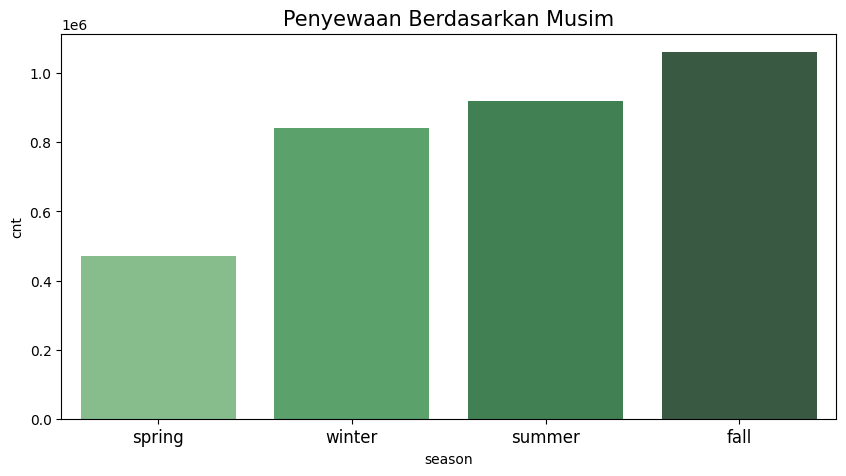

In [89]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    data=sum_cnt_w_season.sort_values(by="cnt", ascending=True),
    palette=sns.color_palette("Greens_d", n_colors=4)
)
plt.title("Penyewaan Berdasarkan Musim", loc="center", fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

menghitung jumlah penyewaan setiap jam

In [90]:
sum_cnt_w_hr = hour_df.groupby(by="hr")["cnt"].sum().reset_index()
sum_cnt_w_hr.rename(columns={"cnt": "avg_cnt"}, inplace=True)

membuat visualisasi menggunakan line chart berdasar pada jam

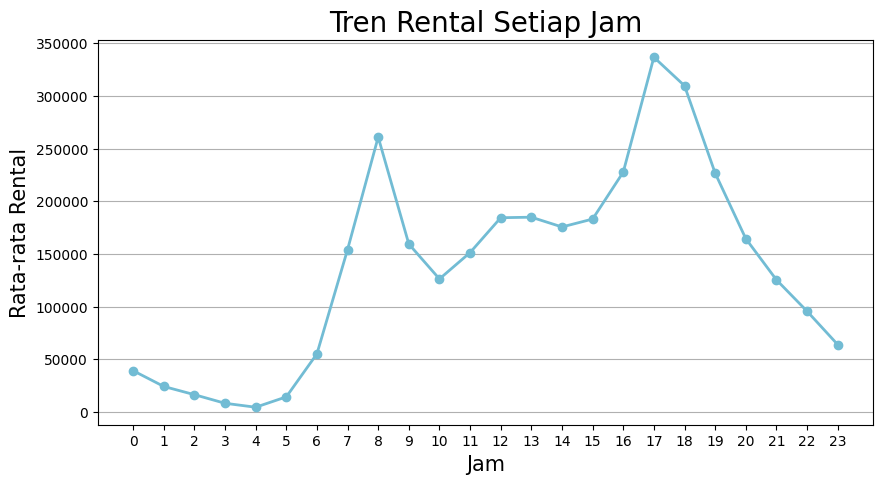

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(
    sum_cnt_w_hr.index,
    sum_cnt_w_hr["avg_cnt"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Tren Rental Setiap Jam", loc="center", fontsize=20)
plt.xlabel("Jam", fontsize=15)
plt.ylabel("Rata-rata Rental", fontsize=15)
plt.xticks(range(0, 24))
plt.grid(axis="y")
plt.show()

**Insight:**
- Di sini kita mendapatkan visualisasi data berupa tabel histogram. Berdasar musim, penyewaan paling banyak berada pada musim gugur dan paling sedikit pada musim panas.
- Untuk cnt berdasar jam, kita menggunakan visualisasi berupa line chart. Berdasarkan jam, penyewaan terbanyak berada di jam 17 dan paling sedikit di jam 4

gabungkan data hour dan day, kemudian cek kembali apakah ada kesalahan

In [92]:
all_df = pd.concat([hour_df, day_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     18110 non-null  int64         
 1   dteday      18110 non-null  datetime64[ns]
 2   season      18110 non-null  object        
 3   yr          18110 non-null  int64         
 4   mnth        18110 non-null  int64         
 5   hr          17379 non-null  float64       
 6   holiday     18110 non-null  int64         
 7   weekday     18110 non-null  int64         
 8   workingday  18110 non-null  int64         
 9   weathersit  18110 non-null  int64         
 10  temp        18110 non-null  float64       
 11  atemp       18110 non-null  float64       
 12  hum         18110 non-null  float64       
 13  windspeed   18110 non-null  float64       
 14  casual      18110 non-null  int64         
 15  registered  18110 non-null  int64         
 16  cnt         18110 non-null  i

terdapat missing value pada kolom hr, karena kita tidak dapat mengetahui jam penyewaannya maka dapat di drop, lalu cek kembali data

In [93]:
all_df.dropna(inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  float64       
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-null 

In [94]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


menyimpan data yang telah diubah dalam bentuk csv

In [95]:
all_df.to_csv("main_data.csv", index=False)

## Analisis Lanjutan (Opsional)

clustering berdasarkan jam dan kondisi cuaca

In [96]:
hour_weather_group = all_df.groupby(['hr', 'weathersit']).agg({
    'cnt': 'sum',
}).reset_index()
hour_weather_group

,hr,weathersit,cnt
0,0.0,1,28930
1,0.0,2,8738
2,0.0,3,1462
3,1.0,1,16854
4,1.0,2,6362
...,...,...,...
70,22.0,2,19159
71,22.0,3,3869
72,23.0,1,46239
73,23.0,2,14394


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

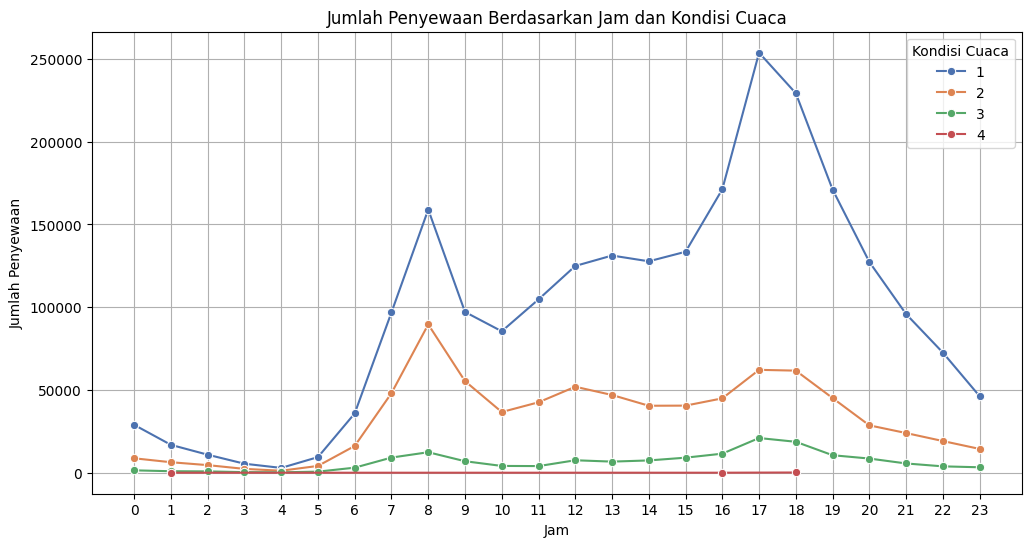

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=hour_weather_group,
    x='hr',
    y='cnt',
    hue='weathersit',
    marker='o',
    palette='deep'
)
plt.title('Jumlah Penyewaan Berdasarkan Jam dan Kondisi Cuaca')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Kondisi Cuaca')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

## Conclusion

**Conclusion:**
- Berdasar musim, penyewaan paling banyak berada pada musim gugur dan paling sedikit pada musim semi.
- Berdasarkan jam, penyewaan terbanyak berada di jam 17 dan paling sedikit di jam 4
- Penyewaan sepeda cenderung tinggi di cuaca yang cerah, sedangkan saat cuaca buruk, tidak ada yang menyewa. Seperti analisis sebelumnya bahwa penyewaan terbanyak ada di pukul 17, akan tetapi saat cuaca mendung, orang banyak yang menyewa di pukul 8. Asumsi saya bahwa ini  karena udara menjadi sangat sejuk saat mendung dan pagi hari.